Importamos modulos y archivos necesarios

In [25]:
import matplotlib.pyplot as plt
import cv2
from scipy import signal
import numpy as np

# Viasampling


In [26]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/barbara.jpg

--2020-09-02 18:14:53--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/images/barbara.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121838 (119K) [image/jpeg]
Saving to: ‘barbara.jpg’

barbara.jpg         100%[===================>] 118.98K  --.-KB/s    in 0.01s   

2020-09-02 18:14:53 (8.79 MB/s) - ‘barbara.jpg’ saved [121838/121838]



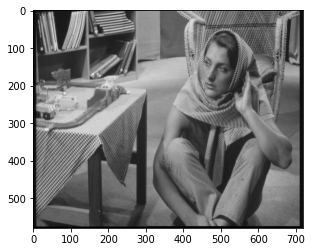

In [27]:
img = cv2.imread('barbara.jpg') 
plt.imshow(img)

In [28]:
from numpy.fft import fft2,ifft2,fftshift

In [29]:
def downsample(image,m,filter):
    N,M = image.shape
    w = 1/m
    F = fftshift(fft2(image))
    # filtro pasabajos para anti alias
    if filter == "FILTER_ON":
        for i in range(N):
            for j in range(N):
                r2 = (i-round(N/2))**2 + (j-round(N/2))**2
                if r2 > (round( (N/2*w)**2 )):
                    F[i,j] = 0
    Idownsampled = np.real(ifft2(fftshift(F)))
    return cv2.resize(src=Idownsampled,dsize=(N//m,N//m),interpolation = cv2.INTER_NEAREST)

In [30]:
def upsample(image,m):
    N,M = image.shape
    Iup = np.zeros((m*N,m*N))
    for i in range(N):
        for j in range(N):
            Iup[m*i,m*j] = image[i,j]

    N,M = Iup.shape
    w = 1/m
    F = fftshift(fft2(Iup))
    # filtro pasabajos para "promediar entre muestras"
    for i in range(N):
        for j in range(N):
            r2 = (i-round(N/2))**2 + (j-round(N/2))**2
            if r2 > (round( (N/2*w)**2 )):
                    F[i,j] = 0
    Iup = (m*m)*abs(ifft2(fftshift(F)))
    return Iup

In [37]:
m = 2
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f1 = gray[0:500,0:500]
f2 = downsample(f1,m,"FILTER_OFF")
f2_on = downsample(f1,m,"FILTER_ON") 
# filter_on = antes de downsamplear aplico un filtro anti alias
f3 = upsample(f2,m)

## Se recomienda ver las imagenes escritas con imwrite ya que con imshow no se pueden llegar a percibir ciertos efectos

Imagen original

True

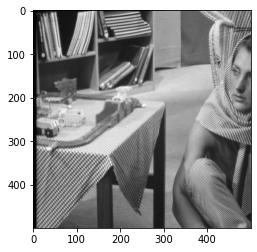

In [32]:
plt.imshow(f1,cmap='gray')
cv2.imwrite('f1.jpg', f1)

Imagen origianl downsampleada, sin filtro anti alias

True

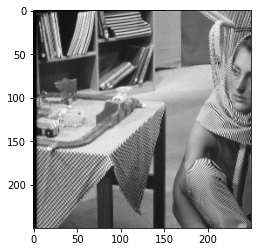

In [33]:
plt.imshow(f2,cmap='gray')
cv2.imwrite('f2.jpg', f2)

Imagen original downsampleada, con filtro anti alias. Vemos que el pañuelo ya no tiene algunos patrones de la imagen anterior que se debian al aliasing.

True

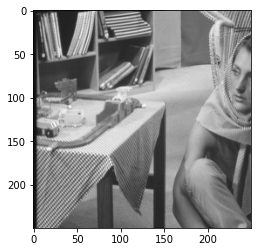

In [34]:
plt.imshow(f2_on,cmap='gray')
cv2.imwrite('f2_on.jpg', f2_on)

Imagen upsampleada

True

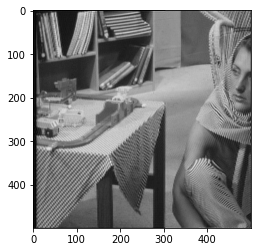

In [35]:
plt.imshow(f3,cmap='gray')
cv2.imwrite('f3.jpg', f3)